<a href="https://colab.research.google.com/github/Keerthi0912K/Review-Revelation/blob/main/Hotel_Review_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

Step 2: Load the data

In [ ]:
data = pd.read_csv('/content/Data Analyst - Test Data - US.csv')

Step 3: Display the first few rows of the dataset

In [ ]:
print(data.head())

                                              Review        date     Location
0  I was very impressed with the resort.\n Great ...  2019/08/20    Sebastian
1  The rooms were nice the outside needs work als...  2019/08/20  Los Angeles
2  Great location! I have stayed at this hotel on...  2019/08/20      Georgia
3  The hotel was adequate for my stay. The strips...  2019/08/20          NaN
4  Great location, room was large and spacious. P...  2019/08/19  Palm Harbor


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6448 non-null   object
 2   Location  1711 non-null   object
dtypes: object(3)
memory usage: 151.2+ KB


In [ ]:
data.shape

(6448, 3)

Step 4: Data cleaning

In [ ]:
#Check for missing values
print(data.isnull().sum())

Review        55
date           0
Location    4737
dtype: int64


In [ ]:
# Drop rows with missing 'Review' or 'Location'
data.dropna(subset=['Review', 'Location'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1705 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    1705 non-null   object
 1   date      1705 non-null   object
 2   Location  1705 non-null   object
dtypes: object(3)
memory usage: 53.3+ KB


In [ ]:
data.shape

(1705, 3)

**Translate Foreign Language Reviews**

In [ ]:
!pip install googletrans==4.0.0-rc1

from googletrans import Translator

# Initialize the translator
translator = Translator()

# Define a function to translate text to English
def translate_to_english(text):
    try:
        translated = translator.translate(text, dest='en')
        return translated.text
    except Exception as e:
        return text

# Apply translation to the 'Review' column
data['Review_Translated'] = data['Review'].apply(translate_to_english)

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=cd20fb43c664e21ee4653b53968956ee21f48f9694603ac9b66a84f2a0208a89
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling ch

In [ ]:
import re

# Function to clean text
def clean_text(text):
    text = text.lower() # Lowercase text
    text = re.sub(r'\n', ' ', text) # Remove newline characters
    text = re.sub(r'\s+', ' ', text) # Remove multiple spaces
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text = re.sub(r'read more', '', text) # Remove 'read more'
    text = re.sub(r'read less', '', text) # Remove 'read less'
    return text

# Clean the translated reviews
data['Review_Cleaned'] = data['Review_Translated'].apply(clean_text)

Exploratory Data Analysis (EDA) of translated and further cleaned data

In [ ]:
# Basic statistics
print(data['Review_Cleaned'].describe())

count                                                  1705
unique                                                 1705
top       I was very impressed with the resort.\nGreat s...
freq                                                      1
Name: Review_Cleaned, dtype: object


In [ ]:
# Length of reviews
data['Review_Length'] = data['Review_Cleaned'].apply(len)
print(data['Review_Length'].describe())

count    1705.000000
mean      247.242229
std       235.681313
min         6.000000
25%       102.000000
50%       162.000000
75%       301.000000
max      1531.000000
Name: Review_Length, dtype: float64


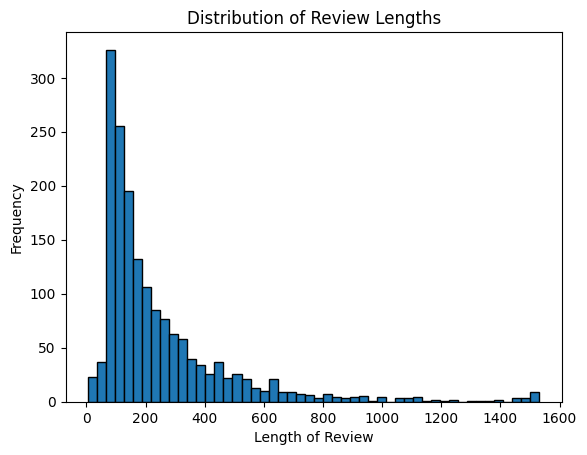

In [ ]:
# Plotting the distribution of review lengths
import matplotlib.pyplot as plt

plt.hist(data['Review_Length'], bins=50, edgecolor='k')
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()

Step 5: Sentiment Analysis

In [ ]:
def get_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)

In [ ]:
data['Sentiment'] = data['Review_Translated'].apply(get_sentiment)

In [ ]:
data['Sentiment'] = data['Review_Cleaned'].apply(get_sentiment)

Step 6: Summary statistics

In [ ]:
print(data['Sentiment'].describe())

count    1705.000000
mean        0.216446
std         0.189055
min        -0.780000
25%         0.108392
50%         0.222222
75%         0.344444
max         1.000000
Name: Sentiment, dtype: float64


Step 7: Visualize the sentiment distribution

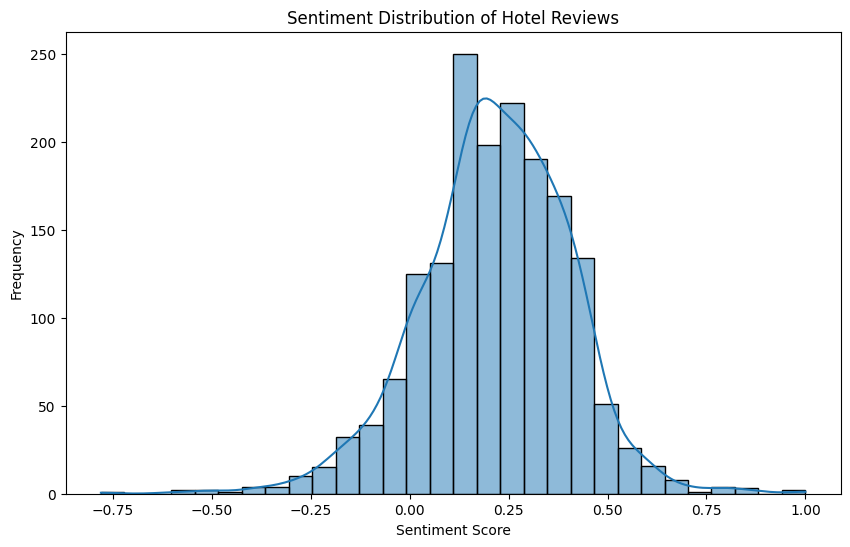

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution of Hotel Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

Step 8: Most common words in reviews

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(data['Review'])
common_words = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Sum the occurrences of each word
word_count = common_words.sum().sort_values(ascending=False)
print(word_count)

read        3054
room         971
hotel        752
staff        562
great        432
location     411
clean        389
nice         378
stay         337
rooms        297
friendly     240
good         233
property     210
check        195
time         176
pool         176
desk         173
parking      169
service      168
like         167
dtype: int64


Step 9: Visualize the most common words

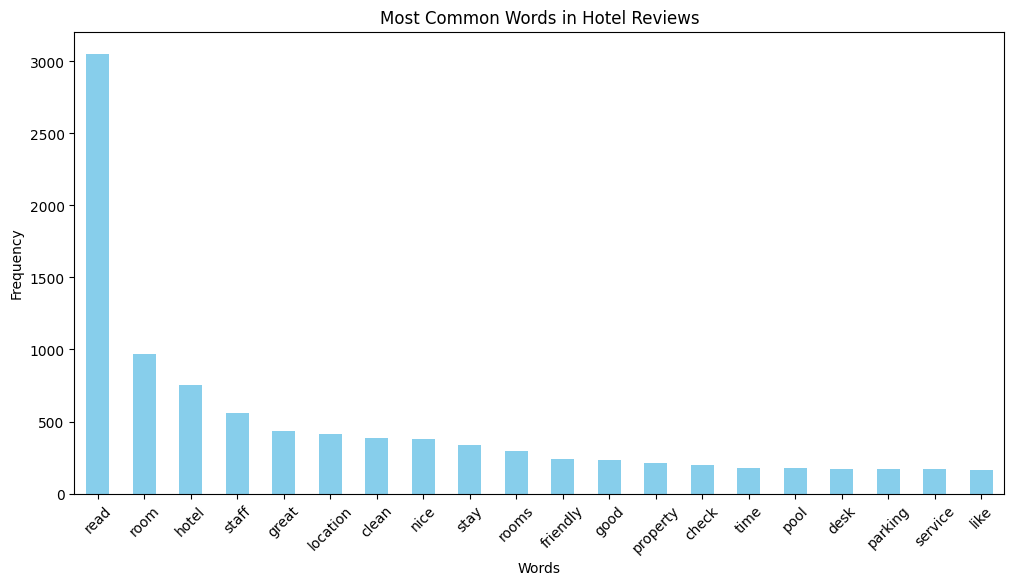

In [ ]:
plt.figure(figsize=(12, 6))
word_count.plot(kind='bar', color='skyblue')
plt.title('Most Common Words in Hotel Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Step 10: Insights

In [ ]:
# 1. Average sentiment score
average_sentiment = data['Sentiment'].mean()
print(f'Average Sentiment Score: {average_sentiment}')

Average Sentiment Score: 0.2164541953816342


In [ ]:
# 2. Count of reviews by location
location_counts = data['Location'].value_counts()
print(location_counts)

Location
United States of America    116
New York                     34
San Jose                     19
California                   19
Florida                      16
                           ... 
State College, PA             1
Los ángeles , us              1
Stroudsburg Pa US             1
Birmingham, al                1
Trinidad and Tobago           1
Name: count, Length: 1078, dtype: int64


In [ ]:
# 3. Top 5 locations with the most reviews
top_locations = location_counts.head(5)
print(f'Top 5 Locations:\n{top_locations}')

Top 5 Locations:
Location
United States of America    116
New York                     34
San Jose                     19
California                   19
Florida                      16
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26481 (\N{CJK UNIFIED IDEOGRAPH-6771}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38442 (\N{CJK UNIFIED IDEOGRAPH-962A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


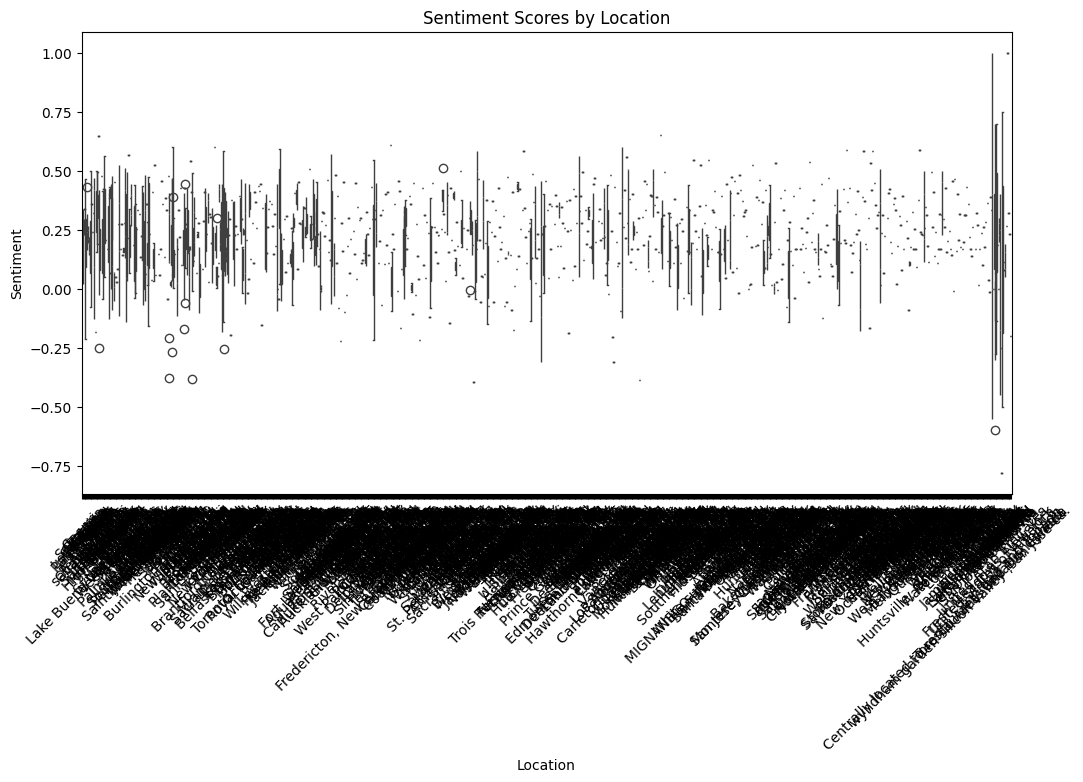

In [ ]:
# 4. Distribution of sentiment scores by location
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Sentiment', data=data)
plt.title('Sentiment Scores by Location')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 5. Overall insights
overall_sentiment = data['Sentiment'].describe()
print("Overall Sentiment Distribution:\n", overall_sentiment)

Overall Sentiment Distribution:
 count    1705.000000
mean        0.216454
std         0.189052
min        -0.780000
25%         0.108392
50%         0.222222
75%         0.344444
max         1.000000
Name: Sentiment, dtype: float64


In [ ]:
#Top 5 Positive Reviews:
top_positive_reviews = data.nlargest(5, 'Sentiment')[['Review_Translated', 'Sentiment']]
print("Top 5 Positive Reviews:\n", top_positive_reviews)

Top 5 Positive Reviews:
                                       Review_Translated  Sentiment
6411  ·bed was great!\n\n\n\n\n·one of the front des...      1.000
6429  ·lovely lively welcome on arrival.\n\n\n\n\n·d...      1.000
6361  ·very good emplacement to visit boston\n\n\n\n...      0.875
6431  ·nice staff family close to the airport after ...      0.875
6369  ·it is a beautiful hotel in a great location.\...      0.825


In [ ]:
#Top 5 Negative Reviews:
top_negative_reviews = data.nsmallest(5, 'Sentiment')[['Review_Translated', 'Sentiment']]
print("Top 5 Negative Reviews:\n", top_negative_reviews)

Top 5 Negative Reviews:
                                       Review_Translated  Sentiment
6367  ·location.\n \n \n \n \n ·the coffee maker in ...      -0.78
6366                                    ·pool was dirty      -0.60
6312  ·the hotel entrance dirty and has a stale smel...      -0.55
6375  ·locarion\n \n \n \n \n ·hotel seemed expensiv...      -0.50
6392           ·the breakfast buffet was too expensive.      -0.50


In [ ]:
#Average Sentiment by Location:
avg_sentiment_location = data.groupby('Location')['Sentiment'].mean().sort_values(ascending=False)
print("Average Sentiment by Location:\n", avg_sentiment_location)

Average Sentiment by Location:
 Location
Ireland                  1.000000
Fairfax Station, VA      0.652222
México                   0.648667
Sacramento, us           0.610000
Brantford,ON. CANADA>    0.601667
                           ...   
Costa Rica              -0.252000
houston, us             -0.311333
Pikeville, Ky           -0.386078
Modesto ca              -0.394444
China                   -0.780000
Name: Sentiment, Length: 1078, dtype: float64


In [ ]:
#Sentiment Over Time:
data['date'] = pd.to_datetime(data['date'])
sentiment_over_time = data.groupby(data['date'].dt.to_period('M'))['Sentiment'].mean()
print("Sentiment Over Time:\n", sentiment_over_time)

Sentiment Over Time:
 date
2018-08    0.213020
2018-09    0.226032
2018-10    0.201132
2018-11    0.225217
2018-12    0.258292
2019-01    0.230731
2019-02    0.214645
2019-03    0.188015
2019-04    0.218039
2019-05    0.210611
2019-06    0.237134
2019-07    0.211222
2019-08    0.207402
Freq: M, Name: Sentiment, dtype: float64


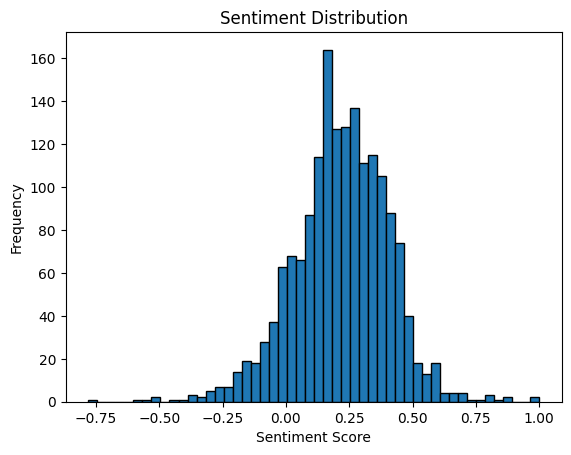

In [ ]:
# Plot sentiment distribution
plt.hist(data['Sentiment'], bins=50, edgecolor='k')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Top 5 positive reviews
top_positive_reviews = data.nlargest(5, 'Sentiment')[['Review_Cleaned', 'Sentiment']]
print("Top 5 Positive Reviews:\n", top_positive_reviews)

# Top 5 negative reviews
top_negative_reviews = data.nsmallest(5, 'Sentiment')[['Review_Cleaned', 'Sentiment']]
print("Top 5 Negative Reviews:\n", top_negative_reviews)


Top 5 Positive Reviews:
                                          Review_Cleaned  Sentiment
6411  ·bed was great!\n\n\n\n\n·one of the front des...      1.000
6429  ·lovely lively welcome on arrival.\n\n\n\n\n·d...      1.000
6361  ·very good emplacement to visit boston\n\n\n\n...      0.875
6431  ·nice staff family close to the airport after ...      0.875
6369  ·it is a beautiful hotel in a great location.\...      0.825
Top 5 Negative Reviews:
                                          Review_Cleaned  Sentiment
6367  ·location.\n \n \n \n \n ·the coffee maker in ...      -0.78
6366                                    ·pool was dirty      -0.60
6312  ·the hotel entrance dirty and has a stale smel...      -0.55
6375  ·locarion\n \n \n \n \n ·hotel seemed expensiv...      -0.50
6392           ·the breakfast buffet was too expensive.      -0.50


In [ ]:
# Average sentiment by location
avg_sentiment_location = data.groupby('Location')['Sentiment'].mean().sort_values(ascending=False)
print("Average Sentiment by Location:\n", avg_sentiment_location)


Average Sentiment by Location:
 Location
Ireland                  1.000000
Fairfax Station, VA      0.652222
México                   0.648667
Sacramento, us           0.610000
Brantford,ON. CANADA>    0.601667
                           ...   
Costa Rica              -0.252000
houston, us             -0.311333
Pikeville, Ky           -0.386078
Modesto ca              -0.394444
China                   -0.780000
Name: Sentiment, Length: 1078, dtype: float64


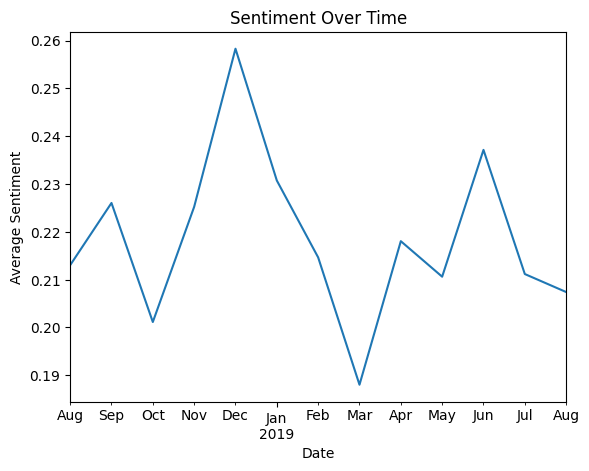

In [ ]:
# Convert date to datetime
data['date'] = pd.to_datetime(data['date'])

# Sentiment over time
sentiment_over_time = data.groupby(data['date'].dt.to_period('M'))['Sentiment'].mean()
sentiment_over_time.plot(kind='line')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.show()


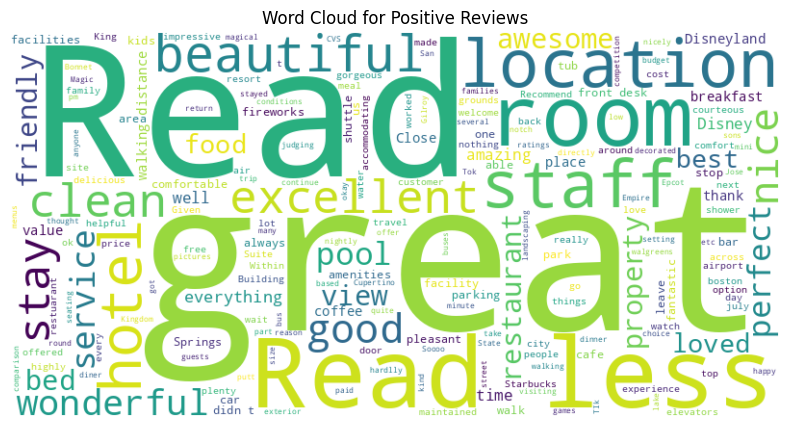

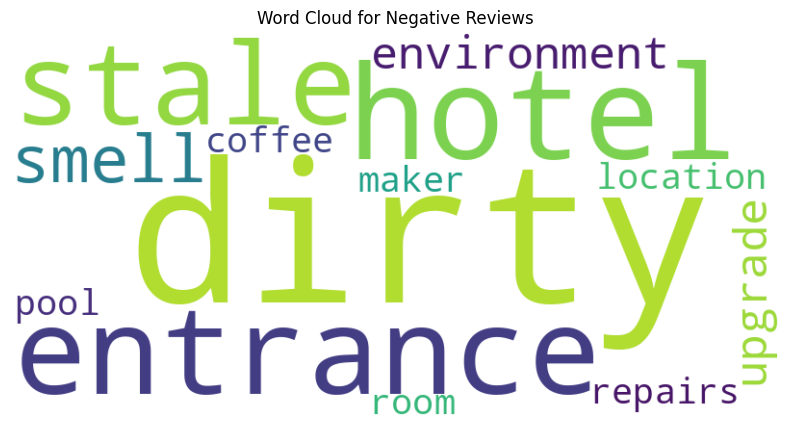

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for positive reviews
positive_text = ' '.join(data[data['Sentiment'] > 0.5]['Review_Cleaned'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

# Generate word cloud for negative reviews
negative_text = ' '.join(data[data['Sentiment'] < -0.5]['Review_Cleaned'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()


In [ ]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Filter out stopwords
stop_words = set(stopwords.words('english'))

def filter_stopwords(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

data['Review_Cleaned'] = data['Review_Cleaned'].apply(filter_stopwords)


In [ ]:
# Function to extract adjectives and meaningful words
def extract_meaningful_words(text):
    word_tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(word_tokens)
    meaningful_words = [word for word, pos in pos_tags if pos in ['JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS']]
    return ' '.join(meaningful_words)

# Apply the extraction of meaningful words
data['Meaningful_Words'] = data['Review_Cleaned'].apply(extract_meaningful_words)

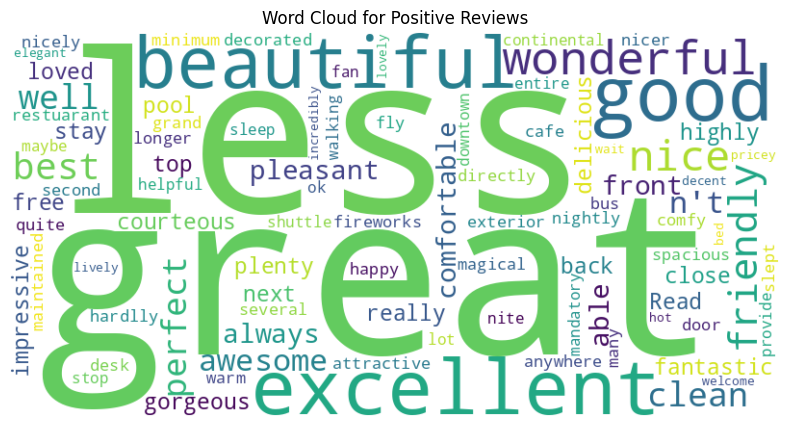

In [ ]:
# Generate word cloud for positive reviews
positive_text = ' '.join(data[data['Sentiment'] > 0.5]['Meaningful_Words'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

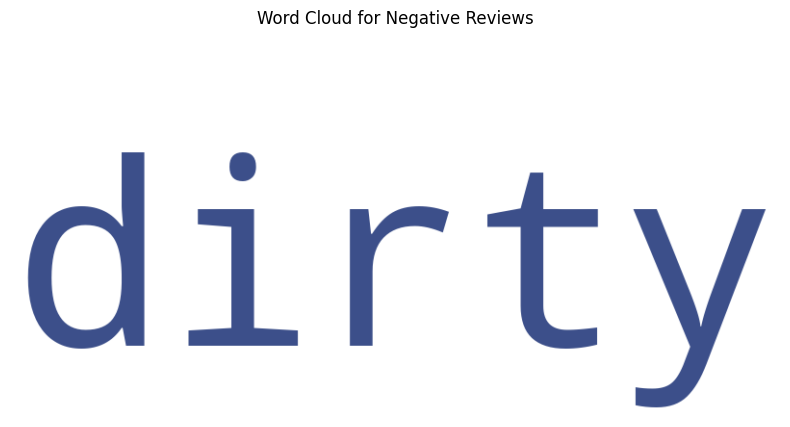

In [ ]:
# Generate word cloud for negative reviews
negative_text = ' '.join(data[data['Sentiment'] < -0.5]['Meaningful_Words'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()